## <font color='red'>Final, No further revison!</font>

**Quantum Illumination with Non-Gaussian States**

- Author: Longfei Fan
- Created Date: 07/01/2016
- Last Modified: 09/01/2016

This file contains the preliminary code and results for quantum illumnination with non-Gaussian states. Code has been summarized in `QI.py`

# Code

In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb, factorial
%matplotlib inline
np.set_printoptions(threshold='nan', precision=6, suppress=True)

### `tm_squeezing(N,s)`, `tm_mixing(N,s)`

In [2]:
def tm_squeezing(N, s):
    """ Two-mode squeezing operator
        N: a positive interger. Photon number is truncated at N, i.e (0, N-1)
        s: a complex number. 's' is the squeezing parameter.
        return: a qutip.Qobj(), operator
    """
    a = destroy(N)
    tms = - np.conj(s) * tensor(a, a) + s * tensor(a.dag(), a.dag())
    return tms.expm()


def tm_mixing(N, s):
    """ Two-mode mixing operator. Photon number is truncated at N. """
    a = destroy(N)
    tmm = s * tensor(a.dag(), a) - np.conj(s) * tensor(a, a.dag())
    return tmm.expm()

### `TMSS(N,s)`, `PS(N,s)`, `PA(N,s)`, `PSA(N,s)`, `PAS(N,s)`, and `PCS(N,s)`

In [3]:
def TMSS(N, s):
    """ Two-mode squeezed state
        N: a positive interger. Photon number is truncated at N, i.e (0, N-1)
        s: a complex number. 's' is the squeezing parameter.
        return: a qutip.Qobj(), vector state
    """
    l = np.tanh(s.real)
    state = np.sum([l**n * tensor(basis(N, n), basis(N, n)) \
                    for n in xrange(N)])
    return state.unit()


def PS(N, s):
    """ Photon subtracted two-mode squeezed state
        N: a positive interger. Photon number is truncated at N, i.e (0, N-1)
        s: a complex number. 's' is the squeezing parameter.
        return: a qutip.Qobj(), vector state
    """
    l = np.tanh(s.real)
    state = np.sum([(n+1) * l**n * tensor(basis(N, n), basis(N, n)) \
                    for n in xrange(N)])
    return state.unit()


def PA(N, s):
    """ Photon added two-mode squeezed state
        N: a positive interger. Photon number is truncated at N, i.e (0, N-1)
        s: a complex number. 's' is the squeezing parameter.
        return: a qutip.Qobj(), vector state
    """
    l = np.tanh(s.real)
    state = np.sum([(n+1) * l**n * tensor(basis(N, n + 1), basis(N, n + 1)) \
                    for n in xrange(N - 1)])
    return state.unit()    


def PSA(N, s):
    """ Photon added then subtracted two-mode squeezed state
        N: a positive interger. Photon number is truncated at N, i.e (0, N-1)
        s: a complex number. 's' is the squeezing parameter.
        return: a qutip.Qobj(), vector state
    """
    l = np.tanh(s.real)
    state = np.sum([(n+1)**2 * l**n * tensor(basis(N, n), basis(N, n)) \
                    for n in xrange(N)])
    return state.unit()


def PAS(N, s):
    """ Photon subtracted then added two-mode squeezed state
        N: a positive interger. Photon number is truncated at N, i.e (0, N-1)
        s: a complex number. 's' is the squeezing parameter.
        return: a qutip.Qobj(), vector state
    """
    l = np.tanh(s.real)
    state = np.sum([(n+1)**2 * l**n * tensor(basis(N, n + 1), basis(N, n + 1)) \
                    for n in xrange(N - 1)])
    return state.unit()


def PCS(N, s, rt_list):
    """ Coherent superposition of photon subtraction and addition on two-mode squeezed state
        N: a positive interger. Photon number is truncated at N, i.e (0, N-1)
        s: a complex number. 's' is the squeezing parameter.
        r: complex numbers.
        return: a qutip.Qobj(), vector state
    """
    l = np.tanh(s.real)
    ta, ra, tb, rb = rt_list
    
    nlist = range(N)
    state1 = np.sum([l**(n+1) * (n+1) * tensor(basis(N, n), basis(N, n)) \
                    for n in nlist])
    state2 = np.sum([l**(n+1) * np.sqrt((n+1)*(n+2)) \
                    * tensor(basis(N, n), basis(N, n + 2)) for n in nlist[:-2]])
    state3 = np.sum([l**(n+1) * np.sqrt((n+1)*(n+2)) \
                    * tensor(basis(N, n + 2), basis(N, n)) for n in nlist[:-2]])
    state4 = np.sum([l**n * (n+1) * tensor(basis(N, n + 1), basis(N, n + 1)) \
                    for n in nlist[:-1]])
    state = ta * tb * state1 + ta * rb * state2 + ra * tb * state3 + ra * rb * state4
    
    return state.unit()

### `RHO_0(state,N,s,Nth,rt_list)`, `RHO_1(state,N,s,Nth,eta,rt_list)`

In [4]:
def RHO_0(state, N, s, Nth, rt_list=False):
    """ State obtained if the object is absent.
        N: a positive interger. Photon number is truncated at N, i.e (0, N-1)
        s: a complex number. 's' is the squeezing parameter.
        r: complex numbers.
        return: a qutip.Qobj(), density matrix
    """
    if not rt_list:
        rho_AB = ket2dm(state(N, s))
    else:
        rho_AB = ket2dm(state(N, s, rt_list))
    return tensor(rho_AB.ptrace(0), thermal_dm(N, Nth))


def RHO_1(state, N, s, Nth, eta, rt_list=False):
    """ State obtained if the object is present.
        N: a positive interger. Photon number is truncated at N, i.e (0, N-1)
        s: a complex number. 's' is the squeezing parameter.
        r: complex numbers.
        return: a qutip.Qobj(), density matrix
    """
    theta = np.arctan(np.sqrt((1 - eta)/eta))
    if not rt_list:
        rho_AB = ket2dm(state(N, s))
    else:
        rho_AB = ket2dm(state(N, s, rt_list))

    # tensor product of state AB and thermal state
    rho = tensor(rho_AB, thermal_dm(N, Nth/(1-eta)))
    
    # state A unchanged, tm_mixing acted on state B and thermal
    op = tensor(qeye(N), tm_mixing(N, -theta))
    
    rho_1 = op * rho * op.dag()
    return rho_1.ptrace([0, 1])

### `QCB(rho_0, rho_1, approx=False)`

In [5]:
def QCB(rho_0, rho_1, approx=False):
    """ Approximated Q for QCB
        Actually the trace of sqrt(rho_1) * sqrt(rho_2)
    """
    if approx:
        return (rho_0.sqrtm() * rho_1.sqrtm()).tr().real
    else:
        pass

### `upper_bound(QCB, M)`, `lower_bound(tr, M)`

In [6]:
def upper_bound(QCB, M):
    """ Upper bound (Quantum Chernoff bound) of the error probability
        using s = 1/2
    """
    return 0.5 * QCB ** M


def lower_bound(tr, M):
    """ Lower bound of the error probability
    """
    return (1 - np.sqrt(1 - tr ** (2 * M))) / 2

In [7]:
def QCB_PCS(ra, rb):
    rt_list = (ra, np.sqrt(1-ra**2), rb, np.sqrt(1-rb**2))
    rho_0 = RHO_0(PCS, N, s, Nth, rt_list)
    rho_1 = RHO_1(PCS, N, s, Nth, eta, rt_list)
    

# I. Quantum Illumination with Non-Gaussian States

## Evaluating

In [37]:
# Evaluating states
def P_ERR_vs_M_Data(Nth, N, eta, s):
#     states = {'TMSS': TMSS, 'PS': PS, 'PSA': PSA, 'PCS': PCS}
    states = {'TMSS': TMSS, 'PS': PS, 'PSA': PSA, 'PCS': PCS}
    Ms = np.logspace(2, 5, num=50)
    Ms = np.array([np.int(i) for i in Ms])
    
    ra, tb = 0.1, 0.25
    rt_list = (np.sqrt(1-ra**2), ra, tb, np.sqrt(1-tb**2))

    data_tr, data_bound = {}, {}
    for state_name, state_func in states.iteritems():
        if state_name == 'PCS':
            rho_0 = RHO_0(state_func, N, s, Nth, rt_list)
            rho_1 = RHO_1(state_func, N, s, Nth, eta, rt_list)            
        else:
            rho_0 = RHO_0(state_func, N, s, Nth)
            rho_1 = RHO_1(state_func, N, s, Nth, eta)
        
        tr_sqrt = QCB(rho_0, rho_1, approx=True)
        data_tr[state_name] = tr_sqrt
        
        lower = np.array([lower_bound(tr_sqrt, M) for M in Ms])
        upper = np.array([upper_bound(tr_sqrt, M) for M in Ms])
        data_bound[state_name] = (lower, upper)
        
    return Ms, data_tr, data_bound

## Ploting

In [38]:
def P_ERR_vs_M_Plot(title, data):
    x, data_tr, data_bound = data
    for state in ('TMSS', 'PS', 'PSA', 'PCS'):
        print state, data_tr[state]
    
    lsty = {'TMSS': '-', 'PS': '--', 'PSA': '-.', 'PCS': '--'}
    fig, ax = plt.subplots()
    for state in ('TMSS', 'PS', 'PSA', 'PCS'):
        ax.plot(x, data_bound[state][1], color='b', ls=lsty[state], label=state)
        ax.plot(x, data_bound[state][0], color='r', ls=lsty[state], label=state)
        
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim([1e-6, 1])
#     ax.set_xlim([1e2, 1e7])
    
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('$M$', fontsize=16)
    ax.set_ylabel('$P_{err}$', fontsize=16)

    lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=None)
    
    return fig, lgd

### 1. $N_s = 0.01, N_{th} = 0.1, \eta = 0.01$.

TMSS 0.999914200049
PS 0.999677113284
PSA 0.998900522122
PCS 0.993858364839


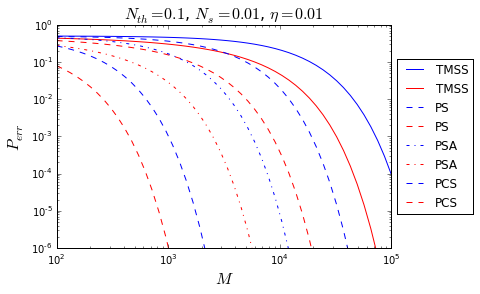

In [39]:
Nth = 0.1     # Average thermal photon numbers
N = 10        # Truncated photon numbers, i.e., 0 ~ N-1
eta = 0.01    # Transmissivity

Ns = 0.01     # Average photon number of the initial two-mode squeezed states
lmd = np.sqrt(Ns/(1 + Ns))     # 
s = np.arcsinh(np.sqrt(Ns))    # Squeezed parameter

data = P_ERR_vs_M_Data(Nth, N, eta, s)
fig, lgd = P_ERR_vs_M_Plot('$N_{th} = 0.1$, $N_s = 0.01$, $\eta = 0.01$', data)
fig.savefig("N_1e-1.svg", bbox_extra_artists=(lgd,), bbox_inches='tight')

### 2. $N_s = 0.01, N_{th} = 1, \eta = 0.01$.

TMSS 0.999956151234
PS 0.999845864667
PSA 0.99953052365
PCS 0.998177140255


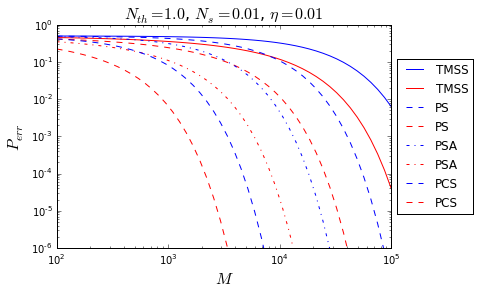

In [40]:
Nth = 1       # Average thermal photon numbers
N = 15        # Truncated photon numbers, i.e., 0 ~ N-1
eta = 0.01    # Transmissivity

Ns = 0.01     # Average photon number of the initial two-mode squeezed states
lmd = np.sqrt(Ns/(1 + Ns))     # 
s = np.arcsinh(np.sqrt(Ns))    # Squeezed parameter

data = P_ERR_vs_M_Data(Nth, N, eta, s)
fig, lgd = P_ERR_vs_M_Plot('$N_{th} = 1.0$, $N_s = 0.01$, $\eta = 0.01$', data)
fig.savefig("N_1e0.svg", bbox_extra_artists=(lgd,), bbox_inches='tight')

### 3. $N_s = 0.01, N_{th} = 10, \eta = 0.01$.

TMSS 0.999830445726
PS 0.999546584701
PSA 0.998631285016
PCS 0.993771649159


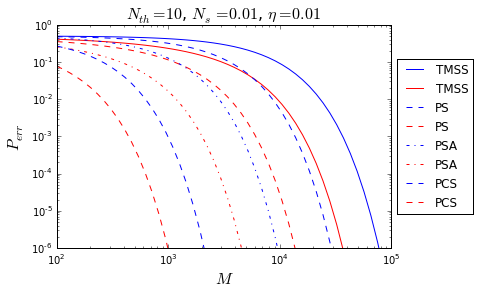

In [41]:
Nth = 10      # Average thermal photon numbers
N = 20        # Truncated photon numbers, i.e., 0 ~ N-1
eta = 0.01    # Transmissivity

Ns = 0.01     # Average photon number of the initial two-mode squeezed states
lmd = np.sqrt(Ns/(1 + Ns))     # 
s = np.arcsinh(np.sqrt(Ns))    # Squeezed parameter

data = P_ERR_vs_M_Data(Nth, N, eta, s)
fig, lgd = P_ERR_vs_M_Plot('$N_{th} = 10$, $N_s = 0.01$, $\eta = 0.01$', data)
fig.savefig("N_1e1.svg", bbox_extra_artists=(lgd,), bbox_inches='tight')